**Exploratory Data Analysis - 1**

In [92]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
pip install -U kaleido

Requirement already up-to-date: kaleido in /usr/local/lib/python3.7/dist-packages (0.2.0)


In [94]:
import pandas as pd 
data = pd.read_csv("/content/drive/MyDrive/Sem-2/DAV/bestsellers with categories.csv")  
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [95]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [97]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Sorting the data frame based on each of the following criteria

In [98]:
sorted_user_rating = data.sort_values(by="User Rating",ascending=False)
sorted_price = data.sort_values(by="Price")
sorted_year = data.sort_values(by="Year")
sorted_reviews = data.sort_values(by="Reviews",ascending=False)


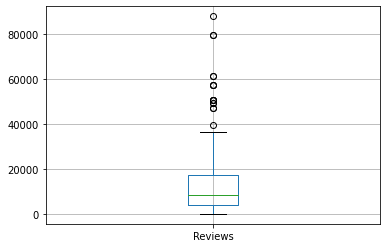

In [99]:
data.boxplot(column="Reviews")
plt.savefig('box_plot')
plt.show()

## **Bivariate Analysis**

# Numeric vs Numeric Data


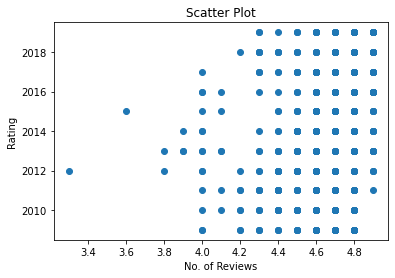

In [100]:
plt.scatter(data["User Rating"],data["Year"])
plt.title("Scatter Plot")
plt.xlabel("No. of Reviews")
plt.ylabel("Rating")
plt.savefig('scatter_plot')


## Plotting based on genres

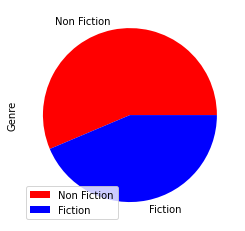

In [101]:
mycolors = ["r", "b"]
data['Genre'].value_counts().plot(kind='pie',colors=mycolors)
plt.legend(loc=3,fontsize=10)
plt.savefig('pie')




# Plotting based on Authors

In [102]:
list1 = data['Author'].value_counts().to_dict()

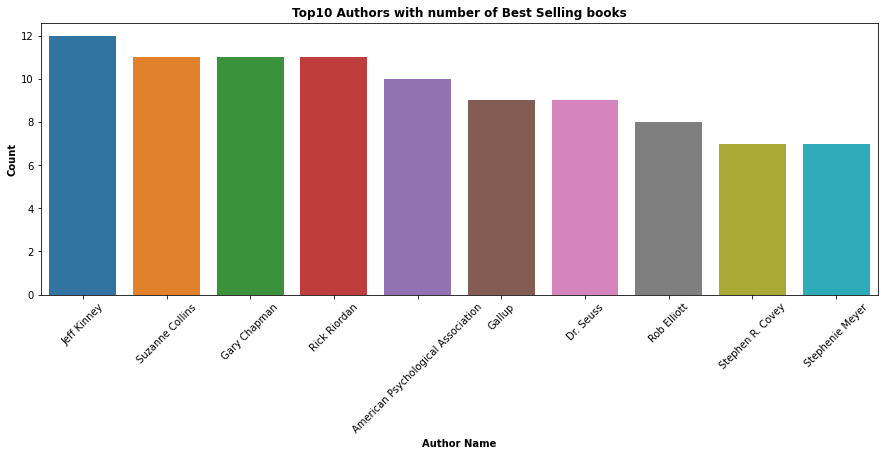

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.barplot(x=data['Author'].value_counts().head(10).index, y=data['Author'].value_counts().head(10).values,palette="tab10")
#df['Author'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.title('Top10 Authors with number of Best Selling books',fontweight="bold")
plt.xticks(rotation=45)
plt.savefig('top_10_authors')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



The mean of User Rating is: 4.618363636363641
The median of User Rating is: 4.7


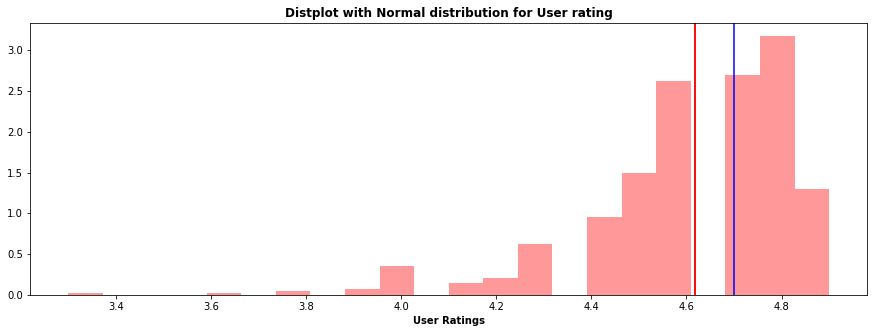

In [104]:
plt.figure(figsize=(15,5))
sns.distplot(data['User Rating'], kde=False,color=['red'],norm_hist=True,hist=True)
plt.axvline(data['User Rating'].mean(),color='red')
plt.axvline(data['User Rating'].mean(),color='red')
plt.axvline(data['User Rating'].median(), color='blue')
plt.title('Distplot with Normal distribution for User rating',fontweight="bold")
plt.xlabel('User Ratings',fontweight="bold",fontsize=10)

print("The mean of User Rating is: {}".format(data['User Rating'].mean()))
print("The median of User Rating is: {}".format(data['User Rating'].median()))
plt.savefig('normal_distribution')
plt.show()

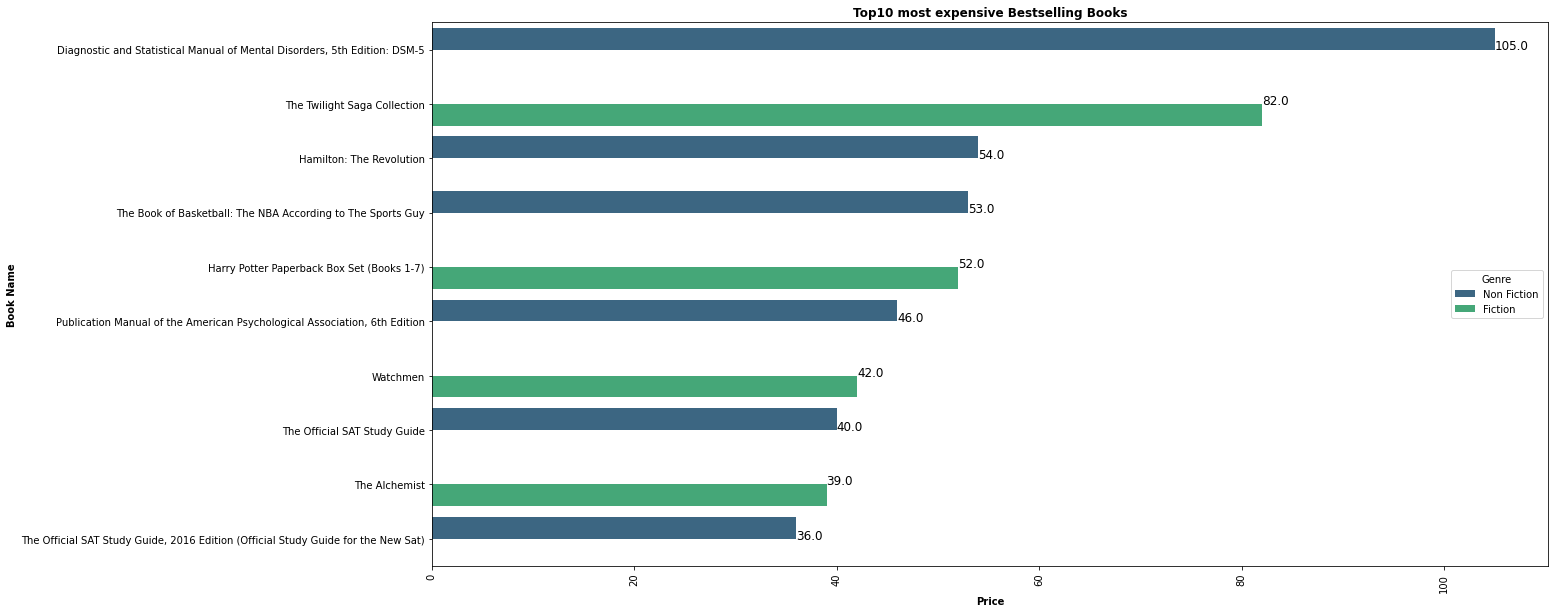

In [105]:
df_price = data.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean()
df_price_top10 = data.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values(
    'Price', ascending=False).head(10)

plt.figure(figsize=(20,10))
sns.barplot(y='Name',x='Price',data=df_price_top10,hue='Genre',palette="viridis")
y=df_price_top10['Price']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title("Top10 most expensive Bestselling Books",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Price',fontweight="bold",fontsize=10)
plt.ylabel('Book Name',fontweight="bold",fontsize=10)
plt.savefig('top_10_best_selling_books')
plt.show()

In [106]:
df_price_yearwise = data.groupby(['Year','Genre'], as_index=False)['Price'].mean()
df_price_yearwise_togather = data.groupby(['Year'], as_index=False)['Price'].mean()
df_price_yearwise_f = df_price_yearwise[df_price_yearwise['Genre']=='Fiction']
df_price_yearwise_nf = df_price_yearwise[df_price_yearwise['Genre']=='Non Fiction']

t1 = go.Scatter(x=df_price_yearwise_nf['Year'], y=df_price_yearwise_nf["Price"], name="Non Fiction",
                marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_price_yearwise_f['Year'], y=df_price_yearwise_f["Price"], name="Fiction",
                marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_price_yearwise_togather['Year'], y=df_price_yearwise_togather["Price"], name="Combined",
                marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="<b>Avg. Price of Bestselling Books</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Price",title_x=0.5)
fig.show()

In [107]:
fig.write_image("avg_price.png")

ValueError: ignored